In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style

## Import Dependencies

In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Datetime
import datetime as dt

# SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
#create enginge for the 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

## These two things give me the same thing

In [4]:
#Use inspector to explore the database and print the table names 
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

## Reflect Tables into SQLAlchemy ORM

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Query percipitation data for the last 12 months

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
sel = [Measurement.date, func.max(Measurement.prcp)]
past_12mo = session.query(*sel).filter(Measurement.date.between('2016-08-23', '2017-08-23')).group_by(Measurement.date).\
    order_by(Measurement.date).all()
print(past_12mo)

[('2016-08-23', 1.79), ('2016-08-24', 2.28), ('2016-08-25', 0.21), ('2016-08-26', 0.04), ('2016-08-27', 0.18), ('2016-08-28', 2.07), ('2016-08-29', 0.9), ('2016-08-30', 0.05), ('2016-08-31', 2.46), ('2016-09-01', 0.02), ('2016-09-02', 0.19), ('2016-09-03', 1.0), ('2016-09-04', 0.74), ('2016-09-05', 0.18), ('2016-09-06', 1.0), ('2016-09-07', 1.35), ('2016-09-08', 0.22), ('2016-09-09', 0.35), ('2016-09-10', 1.16), ('2016-09-11', 0.6), ('2016-09-12', 1.04), ('2016-09-13', 1.2), ('2016-09-14', 6.7), ('2016-09-15', 3.35), ('2016-09-16', 0.61), ('2016-09-17', 0.36), ('2016-09-18', 0.42), ('2016-09-19', 0.25), ('2016-09-20', 0.43), ('2016-09-21', 1.02), ('2016-09-22', 0.75), ('2016-09-23', 0.94), ('2016-09-24', 0.27), ('2016-09-25', 0.04), ('2016-09-26', 1.02), ('2016-09-27', 1.0), ('2016-09-28', 0.08), ('2016-09-29', 1.49), ('2016-09-30', 0.38), ('2016-10-01', 1.02), ('2016-10-02', 0.61), ('2016-10-03', 0.46), ('2016-10-04', 3.46), ('2016-10-05', 0.81), ('2016-10-06', 0.07), ('2016-10-07', 0

In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(past_12mo, columns =['date', 'percipitation'])
prcp_df.set_index('date', inplace = True)


In [11]:
#look at it
prcp_df

,percipitation
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


## Exploratory Climate Analysis

In [12]:
style.use('fivethirtyeight')

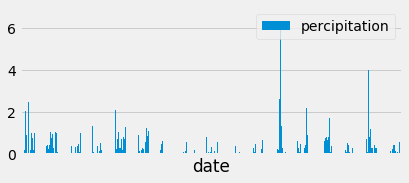

<Figure size 432x288 with 0 Axes>

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar()
plt.tight_layout()
plt.xticks([])
plt.show()
plt.savefig("date_percip")

# this is a weird looking graph!

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
prcp_df.describe()

,percipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('station')


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

## Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
stations

9

In [17]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
      func.count(Measurement.station)]

station_max = session.query(*sel).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_max

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [Measurement.tobs,
      func.max(Measurement.tobs),
      func.min(Measurement.tobs),
      func.avg(Measurement.tobs)]

station_temp = session.query(*sel).filter(Measurement.station == 'USC00519281').\
    all()

station_temp

[(54.0, 85.0, 54.0, 71.66378066378067)]

## Get the temperature for the past 12 months for the station with the highest observations

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.station,
      Measurement.tobs]

temp_12mo = session.query(*sel).filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    filter(Measurement.station =='USC00519281').all()
print(temp_12mo)


[('USC00519281', 77.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 75.0), ('USC00519281', 73.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 73.0), ('USC00519281', 74.0), ('USC00519281', 80.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 76.0), ('USC00519281', 79.0), ('USC00519281', 75.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 76.0), ('USC00519281', 74.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519

## Graph it

In [20]:
# Save the query results as a Pandas DataFrame
tobs_df = pd.DataFrame(temp_12mo, columns =['station', 'tobs'])
tobs_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


In [21]:
style.use('ggplot')

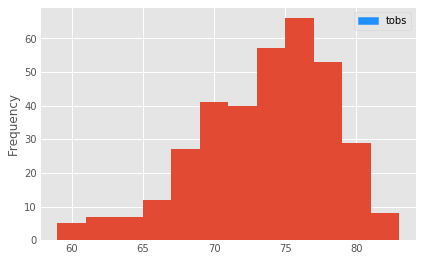

<Figure size 432x288 with 0 Axes>

In [22]:
plt.hist(tobs_df['tobs'], bins=12)
plt.ylabel('Frequency')
blue_patch = mpatches.Patch(color='dodgerblue', label='tobs')
plt.legend(handles=[blue_patch])
plt.show()
plt.savefig("temp_frequency")

## Optional Stuff

In [23]:
 #This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2011-02-28','2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [25]:
# Plot the results from your previous query as a bar chart. 
temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >='2011-02-28').filter(Measurement.date <= '2011-03-05').all()
# Use "Trip Avg Temp" as your Title
temp_df = pd.DataFrame(temps, columns =['Min', 'Avg', 'Max'])
temp_df.head()

temps

[(61.0, 69.75510204081633, 75.0)]

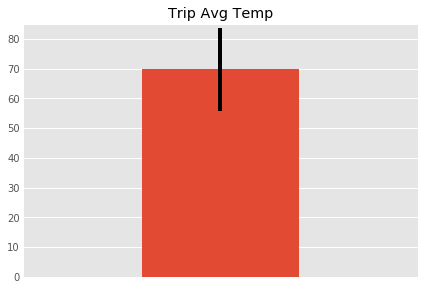

<Figure size 432x288 with 0 Axes>

In [32]:
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_axis = 1 

error = np.array([61, 75])

plt.bar(x_axis, temp_df["Avg"], align = "center", yerr = temp_df["Min"] - temp_df["Max"])
plt.tight_layout()
plt.xlim(0, 2, 1)
plt.ylim(0, 85)
plt.xticks([])
plt.title("Trip Avg Temp")
plt.show()
plt.savefig("trip_avg_temp")

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, func.sum(Measurement.prcp)]


rainfall = session.query(*sel).filter(Measurement.date.between('2011-02-28', '2011-03-05')).group_by(Measurement.station).\
    order_by(Measurement.prcp).all()

print(rainfall)

[('USC00514830', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 17.640000000000008), ('USC00517948', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, None), ('USC00518838', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 20.970000000000006), ('USC00511918', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 5.669999999999999), ('USC00513117', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 12.96000000000001), ('USC00516128', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 13.04999999999999), ('USC00519281', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 20.07000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 12.420000000000003), ('USC00519523', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 19.709999999999987)]


In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []
# Set the start and end date of the trip


# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [31]:
 # Plot the daily normals as an area plot with `stacked=False`